In [2]:
import pandas as pd

df = pd.read_csv("data/preprocessed_data/preprocessed_calories.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Duration    14999 non-null  float64
 1   Heart_Rate  14999 non-null  float64
 2   Body_Temp   14999 non-null  float64
 3   Calories    14999 non-null  float64
dtypes: float64(4)
memory usage: 468.8 KB


In [9]:
from pycaret.regression import *

regression_setup = setup(
    data=df,
    target='Calories',
    normalize=True,
    transformation=True,
    remove_multicollinearity=True,
    session_id=42,
    verbose=True
)

,Description,Value
0,Session id,42
1,Target,Calories
2,Target type,Regression
3,Original data shape,"(14999, 4)"
4,Transformed data shape,"(14999, 3)"
5,Transformed train set shape,"(10499, 3)"
6,Transformed test set shape,"(4500, 3)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [12]:
best_models = compare_models(n_select=3, sort='R2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:16:48
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,8.3028,151.0079,12.2831,0.9612,0.1537,0.1223,0.0350
lightgbm,Light Gradient Boosting Machine,8.3240,153.0829,12.3667,0.9607,0.1508,0.1200,0.0560
rf,Random Forest Regressor,8.5252,160.7217,12.6718,0.9587,0.1549,0.1231,0.0570
dt,Decision Tree Regressor,8.5585,162.1385,12.7272,0.9584,0.1566,0.1238,0.0100
et,Extra Trees Regressor,8.5546,161.9669,12.7208,0.9584,0.1564,0.1237,0.0470
knn,K Neighbors Regressor,9.0429,177.9593,13.3349,0.9543,0.1622,0.1305,0.0130
ada,AdaBoost Regressor,11.4766,217.6781,14.7496,0.9441,0.3880,0.3904,0.0310
lar,Least Angle Regression,13.2682,301.1243,17.3467,0.9227,0.4669,0.5145,0.0110
br,Bayesian Ridge,13.2681,301.1243,17.3467,0.9227,0.4669,0.5145,0.0090
ridge,Ridge Regression,13.2679,301.1243,17.3467,0.9227,0.4667,0.5144,0.0090


In [13]:
tuned_models = [tune_model(m) for m in best_models]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:17:31
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.0348,138.6412,11.7746,0.9644,0.1529,0.1213
1,8.4083,154.9552,12.4481,0.9609,0.1590,0.1255
2,8.2399,144.0391,12.0016,0.9611,0.1557,0.1237
3,8.6143,172.6619,13.1401,0.9567,0.1472,0.1179
4,8.3576,159.5674,12.6320,0.9601,0.1476,0.1181
5,8.1525,150.4293,12.2650,0.9617,0.1499,0.1201
6,8.3836,148.3482,12.1798,0.9606,0.1565,0.1245
7,8.1477,144.4500,12.0187,0.9625,0.1568,0.1257
8,8.3530,151.7521,12.3188,0.9606,0.1547,0.1223


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:17:36
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.1277,136.6595,11.6901,0.9649,0.1642,0.1313
1,8.4214,155.0480,12.4518,0.9609,0.1646,0.1310
2,8.2221,142.6198,11.9424,0.9615,0.1612,0.1293
3,8.7747,173.2344,13.1619,0.9565,0.1548,0.1256
4,8.3539,157.7817,12.5611,0.9606,0.1577,0.1261
5,8.2969,148.8170,12.1991,0.9621,0.1551,0.1257
6,8.4172,146.5631,12.1063,0.9611,0.1663,0.1317
7,8.2203,142.7699,11.9486,0.9629,0.1678,0.1352
8,8.5577,154.5914,12.4335,0.9598,0.1621,0.1290


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:17:46
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.1481,140.0207,11.8330,0.9640,0.1676,0.1353
1,8.3870,154.6662,12.4365,0.9610,0.1667,0.1327
2,8.3624,145.9485,12.0809,0.9606,0.1655,0.1342
3,8.6616,172.8301,13.1465,0.9566,0.1546,0.1249
4,8.4655,161.4161,12.7050,0.9596,0.1617,0.1296
5,8.2659,152.4758,12.3481,0.9612,0.1615,0.1308
6,8.4881,149.4099,12.2233,0.9603,0.1663,0.1333
7,8.2489,145.4808,12.0615,0.9622,0.1693,0.1378
8,8.4223,151.5777,12.3117,0.9606,0.1654,0.1331


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
for model in tuned_models:
    predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,8.3738,155.5326,12.4713,0.9602,0.1521,0.1207


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,8.4625,157.6949,12.5577,0.9597,0.1581,0.1265


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,8.4863,157.6374,12.5554,0.9597,0.1610,0.1292



Model 1: GradientBoostingRegressor(random_state=42)


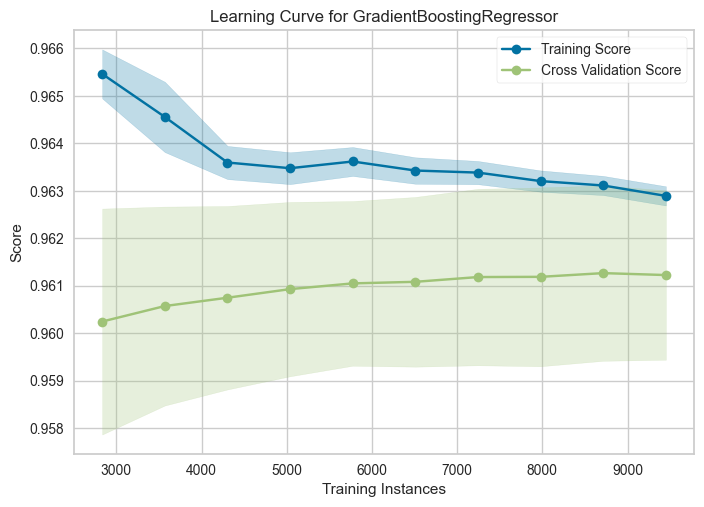

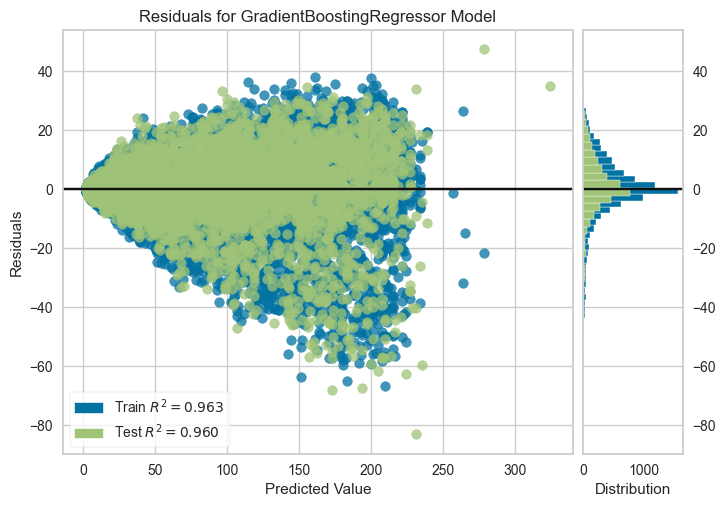

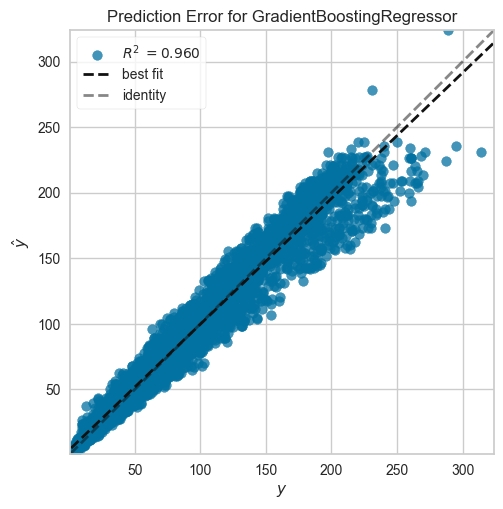

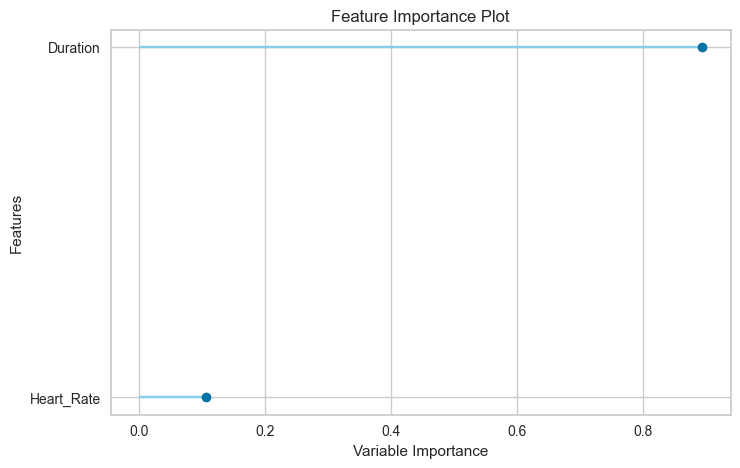

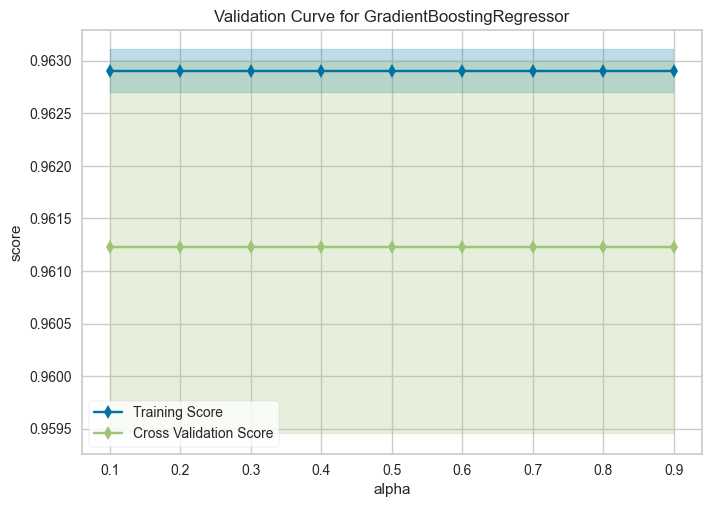


Model 2: LGBMRegressor(bagging_fraction=0.6, bagging_freq=5, feature_fraction=1.0,
              min_child_samples=71, min_split_gain=0.6, n_estimators=130,
              n_jobs=-1, num_leaves=4, random_state=42, reg_alpha=0.3,
              reg_lambda=4)


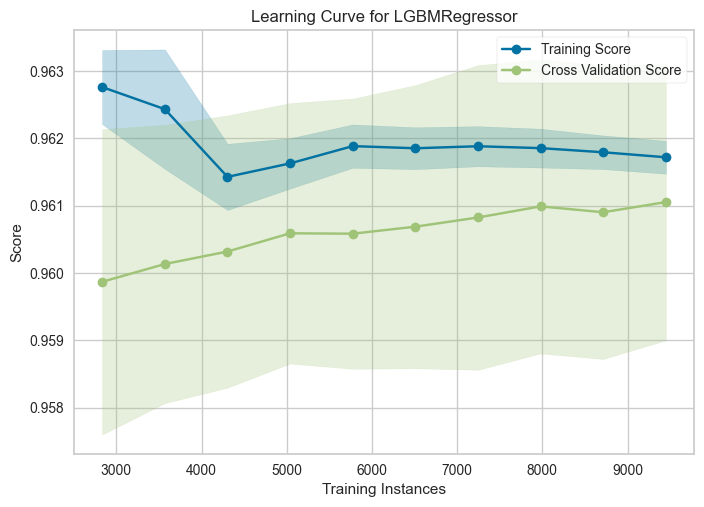

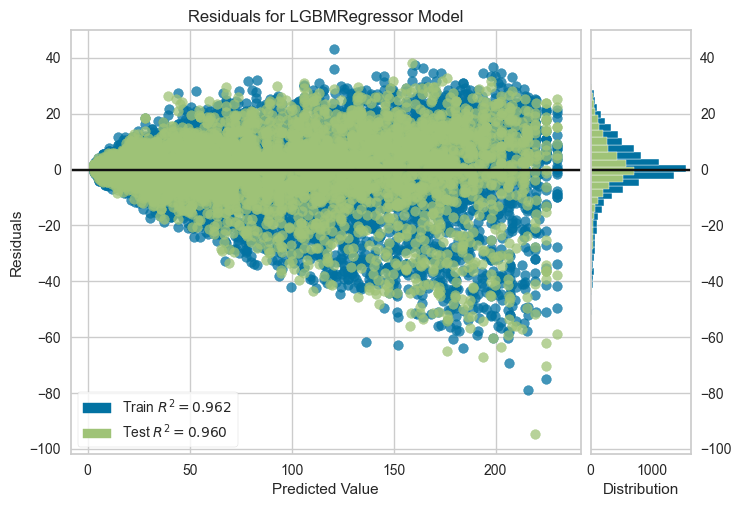

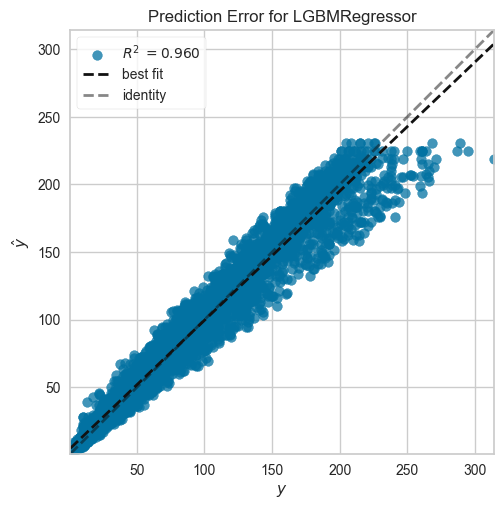

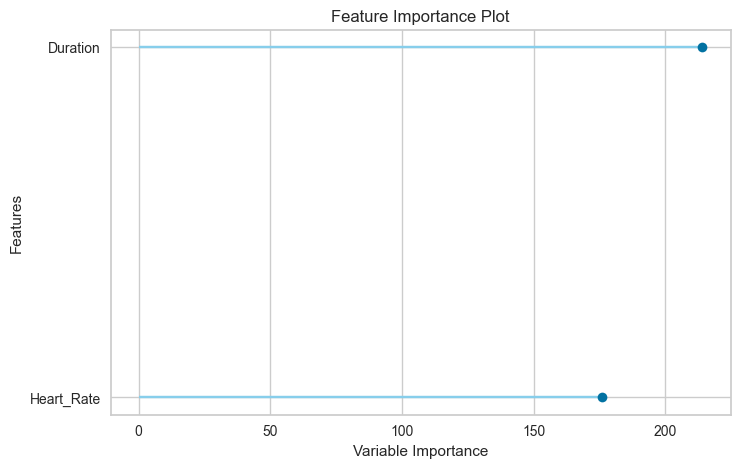

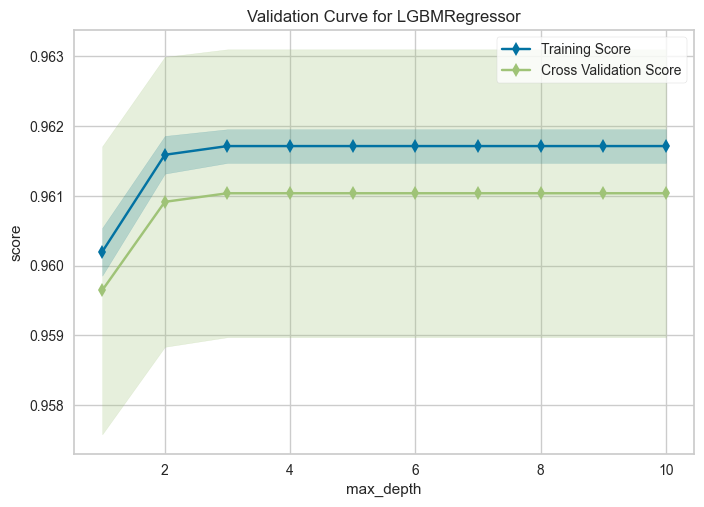


Model 3: RandomForestRegressor(max_depth=8, max_features='log2', min_impurity_decrease=0,
                      min_samples_leaf=4, min_samples_split=10, n_estimators=90,
                      n_jobs=-1, random_state=42)


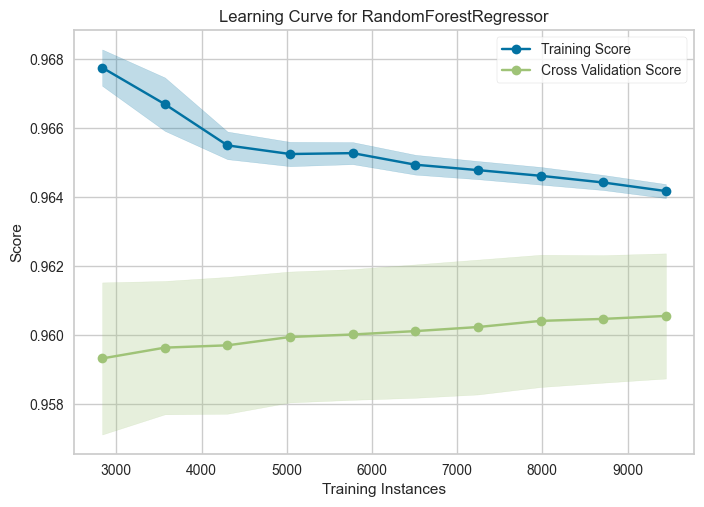

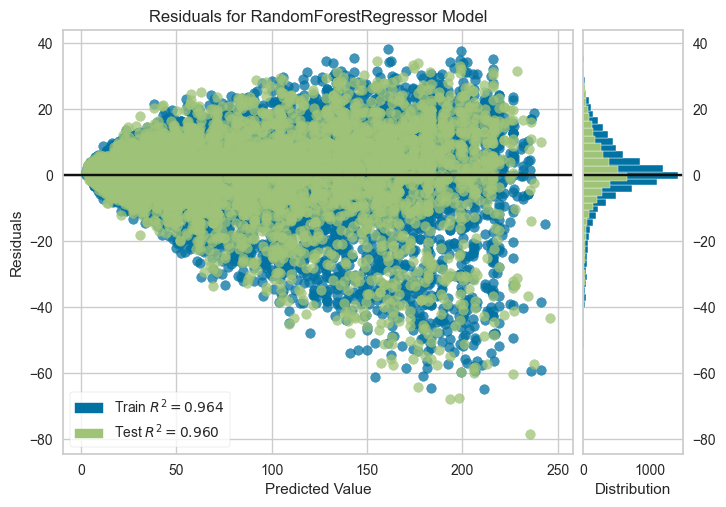

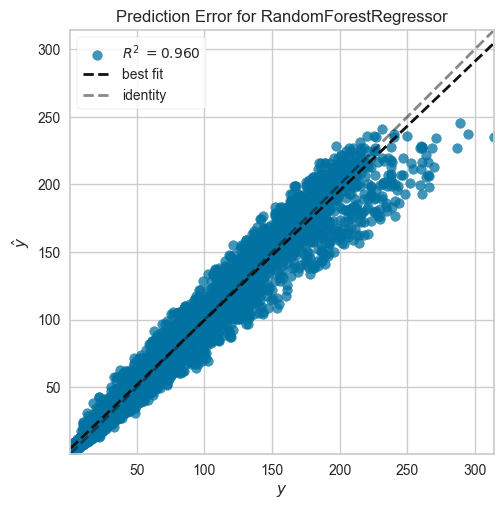

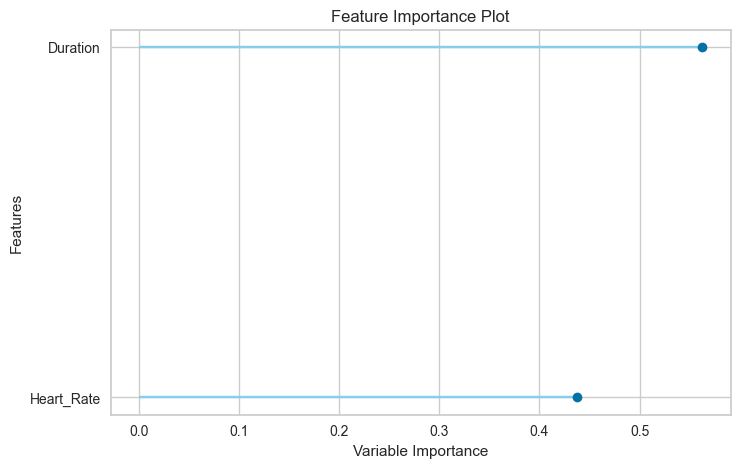

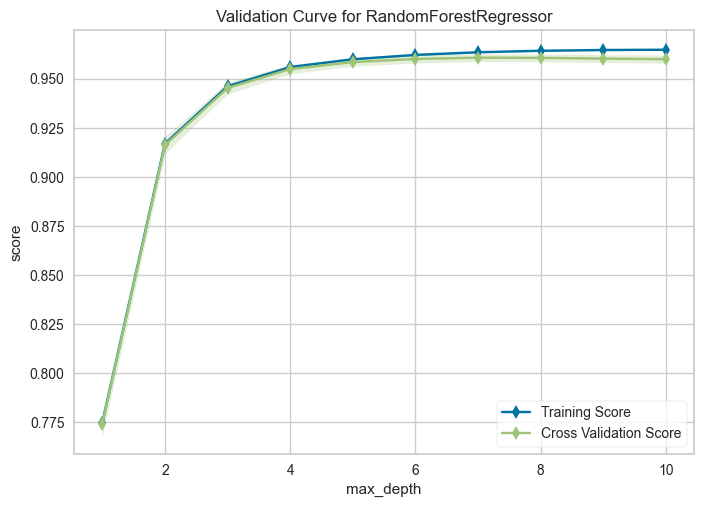

In [22]:
for i, model in enumerate(tuned_models):
    print(f"\nModel {i+1}: {model}")
    plot_model(model, plot='learning')
    plot_model(model, plot='residuals')
    plot_model(model, plot='error')
    plot_model(model, plot='feature')
    plot_model(model, plot='vc')

In [23]:
for i, model in enumerate(tuned_models):
    save_model(model, f'tuned_model_{i+1}')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
